In [1]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_15984/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
!pip install fastai
!pip install timm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [9]:
from fastai.imports import *
# from fastai.vision.all import *
# from fastbook import *
import torch, timm

import warnings
warnings.filterwarnings('ignore')

In [10]:
if torch.cuda.is_available():
    print(True, '-',torch.cuda.get_device_name(0))

In [11]:
# defaults.device = torch.device('cuda')
torch.cuda.set_device(0)
# os.environ['CUDA_VISIBLE_DEVICES']='0'

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# path = '/home/link-28/Desktop/shubham/Data/kumu/data/'
# path = '../Data/NudeNet_classifier_dataset/training/'
# path = '../Data/NudeNet_classifier_dataset_v1/nudity_sefty/'
path = "model_optimization/data/"
im_size = int(input("enter image size : "))
batch_size = int(input("enter batch size : "))

# data = ImageDataLoaders.from_folder(path, item_tfms=[Resize(im_size,method=ResizeMethod.Squish)],batch_tfms=[*aug_transforms(xtra_tfms=None)],  valid_pct = 0.2, bs=batch_size)
data = ImageDataLoaders.from_folder(path, item_tfms=[Resize(im_size,method=ResizeMethod.Squish)],batch_tfms=[*aug_transforms(xtra_tfms=[Dihedral, Flip])],  valid_pct = 0.2, bs=batch_size)
#data = ImageDataLoaders.from_folder(path, train='training', valid='testing', item_tfms=[Resize(im_size,method=ResizeMethod.Squish)],batch_tfms=[*aug_transforms(xtra_tfms=[Dihedral, Flip])], bs=batch_size)

enter image size : 614


In [8]:
cat = data.vocab
cat

['Gambling', 'Pills', 'unknown']

In [26]:
data.show_batch()

In [ ]:
modd = str(input("enter model name : "))

def mod(pretrained=True):
    pretrained = 'imagenet' if pretrained else None
    modl = timm.create_model(modd, pretrained=pretrained)
    return modl

model = cnn_learner(data, mod, pretrained=True, metrics=[accuracy])
model.summary()

In [12]:
# class SimpleRecorder(Callback):
#     def after_epoch(self):
#         #print(self.recorder.values)
#         epoch = self.epoch
#         loss = round(float(self.recorder.losses[-1]),3)
#         val_loss = round(float(self.recorder.loss.value),3)
#         accuracy = round(float(self.recorder.metrics.items[0].value),3)
#         print({'epoch':f'{epoch}/{self.n_epoch}', 'train_loss':loss, 'val_loss':val_loss, 'accuracy':accuracy})

In [11]:
epochs = int(input('epoch : '))
# model.fit_one_cycle(epochs,cbs=[CSVLogger, SimpleRecorder])
model.fit_one_cycle(epochs)#, cbs=[CSVLogger])

epoch : 5


epoch,train_loss,valid_loss,accuracy,time
0,0.946941,0.308708,0.881960,00:14
1,0.623266,0.357721,0.875278,00:14
2,0.450502,0.220679,0.915367,00:14
3,0.361573,0.219183,0.933185,00:15
4,0.330409,0.213859,0.937639,00:15


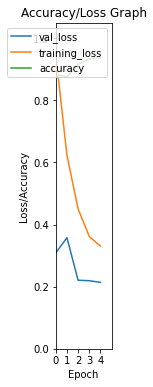

In [12]:
train_loss = [i[0] for i in model.recorder.values]
val_loss = [i[1] for i in model.recorder.values]
accuracy = [i[2] for i in model.recorder.values]

plt.figure(figsize=(int(epochs/3),6))
plt.plot(val_loss)
plt.plot(train_loss)
plt.plot(accuracy)
plt.xticks(np.arange(0, epochs, 1))
plt.ylim([0, 1.05])
plt.xlim([0, epochs])
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Accuracy/Loss Graph')
plt.legend(['val_loss', 'training_loss', 'accuracy'], loc='upper right')

In [10]:
fep = 5 #int(input('epoch : '))
model.fine_tune(fep, freeze_epochs=0)

epoch,train_loss,valid_loss,accuracy,time
0,0.104643,0.129672,0.960699,01:36
1,0.089940,0.145352,0.960699,01:36
2,0.081218,0.128293,0.957424,01:36
3,0.055576,0.130119,0.962336,01:36
4,0.065203,0.124790,0.959061,01:36


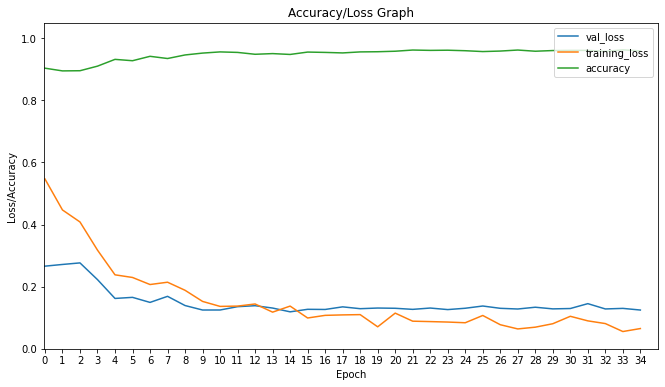

In [11]:
for i in model.recorder.values:
    train_loss.append(i[0])
    val_loss.append(i[1])
    accuracy.append(i[2])
    
plt.figure(figsize=(int((epochs+fep)/3),6))
plt.plot(val_loss)
plt.plot(train_loss)
plt.plot(accuracy)
plt.xticks(np.arange(0, epochs+fep, 1))
plt.ylim([-0, 1.05])
plt.xlim([-0.05, epochs+fep])
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Accuracy/Loss Graph')
plt.legend(['val_loss', 'training_loss', 'accuracy'], loc='upper right')
# plt.savefig(f'Output/kumu_resnet18_8-2.png', bbox_inches='tight', facecolor="White")

In [13]:
model.arch = modd
model.__stored_args__['arch'] = modd

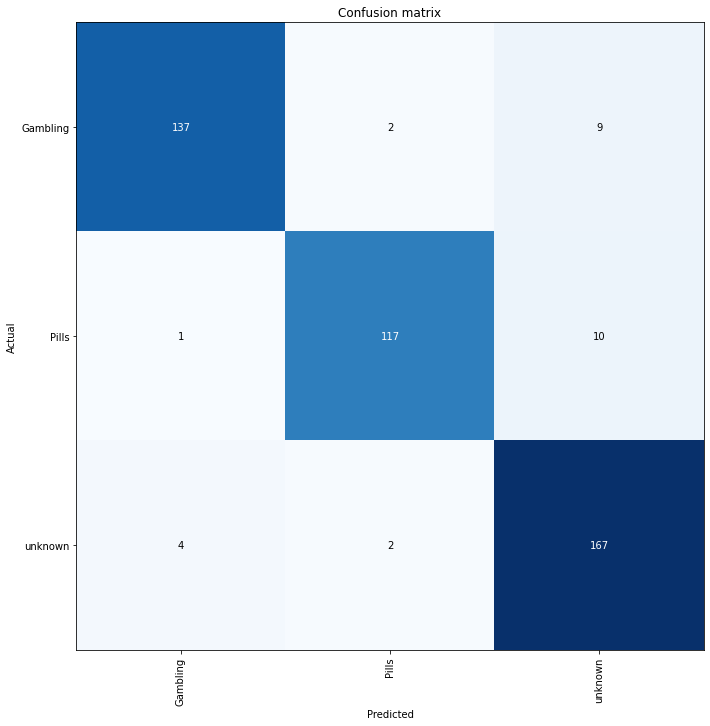

In [14]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(10,10))
# plt.savefig('Output/kumu_resnet18_8-2.png', bbox_inches='tight', facecolor="White")

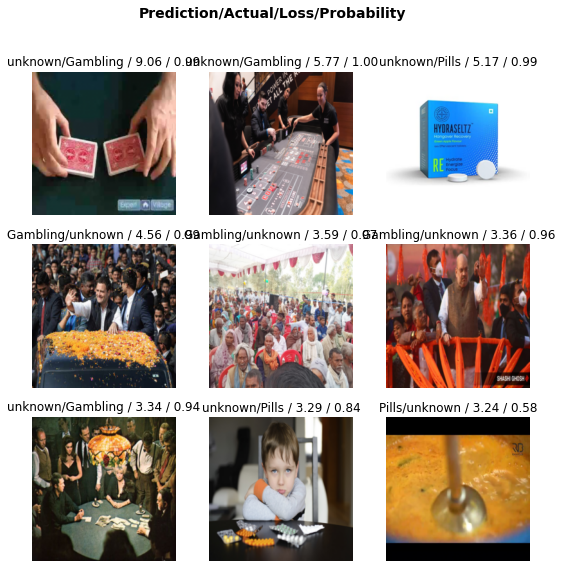

In [15]:
interp.plot_top_losses(9,nrows=3)
# plt.savefig('Output/kumu_fast2_toplosses_inception.png', bbox_inches='tight', facecolor="White")

In [ ]:
# model.show_results(max_n=9)

In [4]:
keys = model.__dict__.keys()
# model.__stored_args__

In [7]:
keys

dict_keys(['dls', 'model', '__stored_args__', 'loss_func', 'opt_func', 'lr', 'splitter', '_metrics', 'path', 'model_dir', 'wd', 'wd_bn_bias', 'train_bn', 'moms', 'training', 'create_mbar', 'logger', 'opt', 'cbs', 'train_eval', 'recorder', 'n_epoch', 'arch', 'normalize', 'n_out', 'pretrained', 'epoch', 'loss', 'train_iter', 'pct_train', 'dl', 'n_iter', 'iter', 'xb', 'yb', 'pred', 'loss_grad', 'smooth_loss', 'final_record', 'progress', 'lock'])

In [6]:
model.__stored_args__

{'loss_func': FlattenedLoss of CrossEntropyLoss(),
 'opt_func': <function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>,
 'lr': 0.001,
 'splitter': <function fastai.vision.learner.default_split(m)>,
 'metrics': <function fastai.metrics.accuracy(inp, targ, axis=-1)>,
 'path': Path('/root/shubham/Deployment/data/62750dae2e9cd412c417f778/SH1xRgKKYJLYzET/data'),
 'model_dir': 'models',
 'wd': None,
 'wd_bn_bias': False,
 'train_bn': True,
 'moms': (0.95, 0.85, 0.95),
 'arch': 'inception_v3',
 'normalize': True,
 'n_out': 2,
 'pretrained': True}

In [15]:
model.validate()

(#2) [0.1247902661561966,0.9590611457824707]

In [16]:
model.export('/home/link-28/Desktop/shubham/annotation/test.pkl')

In [19]:
import wget, time, requests

In [18]:
# path = 'https://s3.ap-south-1.amazonaws.com/km-video-stream/video_analysis/575/video_frame/gif_11.jpg'
path = 'https://s3.ap-south-1.amazonaws.com/km-video-stream/video_analysis/F234F90789B26CD093C93B50F2E9055B/video_frame/gif_1.jpg'
if 'http' in path:
    pred = model.predict(requests.get(path, stream=True).content)
else:
    pred = model.predict(open(path, 'rb').read())
pred

('nude', TensorBase(0), TensorBase([9.9999e-01, 8.5542e-06]))

In [25]:
round(float(pred[2][0]), 2)

1.0

In [4]:
!wget https://s3.ap-south-1.amazonaws.com/ai-studio-new/ai-studio/626be958cc052d5f042d5ac2/zpvIMdllosMycCS/zpvIMdllosMycCS.pkl

--2022-08-25 10:18:58--  https://s3.ap-south-1.amazonaws.com/ai-studio-new/ai-studio/626be958cc052d5f042d5ac2/zpvIMdllosMycCS/zpvIMdllosMycCS.pkl
Resolving s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)... 52.219.64.13
Connecting to s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)|52.219.64.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97529335 (93M) [binary/octet-stream]
Saving to: ‘zpvIMdllosMycCS.pkl’

zpvIMdllosMycCS.pkl 100%[===================>]  93.01M  1.07MB/s    in 2m 20s  

2022-08-25 10:21:18 (683 KB/s) - ‘zpvIMdllosMycCS.pkl’ saved [97529335/97529335]



In [4]:
# import os ; os.environ['CUDA_VISIBLE_DEVICES']='0'
# from fastbook import load_learner #defaults
from fastai.vision.all import *
# import torch
#defaults.device = torch.device('cuda')

import warnings
warnings.filterwarnings('ignore')

/home/toch-28/Desktop/shubham/annotation/localenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# torch.cuda.set_device(0)

In [5]:
# model1 = load_learner('8ZgsLn4C65xtXlN.pkl', cpu=True)
model = load_learner('RYIgOEXbcjZ9RPc.pkl',cpu=False)
# model = load_learner('Output/resnet18_kumu_fast2_v2.pkl',cpu=False)
# model = load_learner('/home/link-28/Desktop/shubham/annotation/Output/resnet18_kumu_nudity.pkl', cpu=True)

In [6]:
next(model.parameters()).is_cuda

True

In [8]:
import time, requests

In [2]:
# path = 'https://ai-studio-new.s3-ap-south-1.amazonaws.com/ai-studio/61d530d64421e70f4e86e1f0/data/f5d7aea-0f10-2b75-0d24-bc45c76dc3ejpg.jpeg'

--2022-08-31 11:10:45--  https://s3.ap-south-1.amazonaws.com/ai-studio-new/ai-studio/62ed23d6f28e6dbf46c0c032/RYIgOEXbcjZ9RPc/RYIgOEXbcjZ9RPc.pkl
Resolving s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)... 52.219.160.17
Connecting to s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)|52.219.160.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47051503 (45M) [binary/octet-stream]
Saving to: ‘RYIgOEXbcjZ9RPc.pkl’

RYIgOEXbcjZ9RPc.pkl 100%[===================>]  44.87M  9.04MB/s    in 4.7s    

2022-08-31 11:10:50 (9.60 MB/s) - ‘RYIgOEXbcjZ9RPc.pkl’ saved [47051503/47051503]



In [7]:
path = '/home/toch-28/Desktop/shubham/lg.jpg'

#CPU
t=time.time()
if 'http' in path:
    pred = model.predict(requests.get(path, stream=True).content)
else:
    pred = model.predict(open(path, 'rb').read())
# print('CPU')
print(time.time()-t)
# for i, j in enumerate(cat):
#     print(f'{cat[i]}:{round(float(pred[2][i]), 3)}')
print({'label': str(pred[0]), 'Confidence' : round(float(pred[2][int(pred[1])]), 3)})
#-------------------------------------------------------------------------------------#
# #GPU
# t=time.time()
# if 'http' in path:
#     pred = model2.predict(requests.get(path, stream=True).content)
# else:
#     pred = model2.predict(open(path, 'rb').read())
# print('GPU')
# print(time.time()-t)
# # for i, j in enumerate(cat):
# #     print(f'{cat[i]}:{round(float(pred[2][i]), 3)}')
# print({'label': str(pred[0]), 'Confidence' : round(float(pred[2][int(pred[1])]), 3)})
# #-------------------------------------------------------------------------------------#

0.03953957557678223
{'label': 'digital', 'Confidence': 0.99}


In [14]:
import os

lis = os.listdir("frames")
lis = [f'{i}.jpg' for i in range(len(lis)+1)]
del lis[0]

for i in lis[359:572]:
    pred = model.predict(f"frames/{i}")
    print(i, {'label': str(pred[0]), 'Confidence' : round(float(pred[2][int(pred[1])]), 3)})

360.jpg {'label': 'unknown', 'Confidence': 0.896}


361.jpg {'label': 'unknown', 'Confidence': 0.955}


362.jpg {'label': 'unknown', 'Confidence': 0.969}


363.jpg {'label': 'unknown', 'Confidence': 0.972}


364.jpg {'label': 'unknown', 'Confidence': 0.971}


365.jpg {'label': 'unknown', 'Confidence': 0.959}


366.jpg {'label': 'unknown', 'Confidence': 0.978}


367.jpg {'label': 'unknown', 'Confidence': 0.978}


368.jpg {'label': 'unknown', 'Confidence': 0.982}


369.jpg {'label': 'unknown', 'Confidence': 0.976}


370.jpg {'label': 'unknown', 'Confidence': 0.946}


371.jpg {'label': 'unknown', 'Confidence': 0.944}


372.jpg {'label': 'unknown', 'Confidence': 0.87}


373.jpg {'label': 'unknown', 'Confidence': 0.955}


374.jpg {'label': 'unknown', 'Confidence': 0.972}


375.jpg {'label': 'unknown', 'Confidence': 0.992}


376.jpg {'label': 'unknown', 'Confidence': 0.993}


377.jpg {'label': 'unknown', 'Confidence': 0.997}


378.jpg {'label': 'unknown', 'Confidence': 0.998}


379.jpg {'label': 'unknown', 'Confidence': 0.999}


380.jpg {'label': 'unknown', 'Confidence': 1.0}


381.jpg {'label': 'unknown', 'Confidence': 1.0}


382.jpg {'label': 'unknown', 'Confidence': 1.0}


383.jpg {'label': 'unknown', 'Confidence': 1.0}


384.jpg {'label': 'unknown', 'Confidence': 1.0}


385.jpg {'label': 'unknown', 'Confidence': 1.0}


386.jpg {'label': 'unknown', 'Confidence': 1.0}


387.jpg {'label': 'unknown', 'Confidence': 1.0}


388.jpg {'label': 'unknown', 'Confidence': 1.0}


389.jpg {'label': 'unknown', 'Confidence': 1.0}


390.jpg {'label': 'unknown', 'Confidence': 1.0}


391.jpg {'label': 'unknown', 'Confidence': 0.999}


392.jpg {'label': 'unknown', 'Confidence': 0.999}


393.jpg {'label': 'unknown', 'Confidence': 1.0}


394.jpg {'label': 'unknown', 'Confidence': 1.0}


395.jpg {'label': 'unknown', 'Confidence': 1.0}


396.jpg {'label': 'unknown', 'Confidence': 1.0}


397.jpg {'label': 'unknown', 'Confidence': 1.0}


398.jpg {'label': 'unknown', 'Confidence': 1.0}


399.jpg {'label': 'unknown', 'Confidence': 0.999}


400.jpg {'label': 'unknown', 'Confidence': 1.0}


401.jpg {'label': 'unknown', 'Confidence': 1.0}


402.jpg {'label': 'unknown', 'Confidence': 1.0}


403.jpg {'label': 'unknown', 'Confidence': 1.0}


404.jpg {'label': 'unknown', 'Confidence': 1.0}


405.jpg {'label': 'unknown', 'Confidence': 1.0}


406.jpg {'label': 'unknown', 'Confidence': 1.0}


407.jpg {'label': 'unknown', 'Confidence': 1.0}


408.jpg {'label': 'unknown', 'Confidence': 1.0}


409.jpg {'label': 'unknown', 'Confidence': 1.0}


410.jpg {'label': 'unknown', 'Confidence': 1.0}


411.jpg {'label': 'unknown', 'Confidence': 1.0}


412.jpg {'label': 'unknown', 'Confidence': 1.0}


413.jpg {'label': 'unknown', 'Confidence': 1.0}


414.jpg {'label': 'unknown', 'Confidence': 1.0}


415.jpg {'label': 'unknown', 'Confidence': 1.0}


416.jpg {'label': 'unknown', 'Confidence': 1.0}


417.jpg {'label': 'unknown', 'Confidence': 1.0}


418.jpg {'label': 'unknown', 'Confidence': 1.0}


419.jpg {'label': 'unknown', 'Confidence': 1.0}


420.jpg {'label': 'unknown', 'Confidence': 1.0}


421.jpg {'label': 'unknown', 'Confidence': 1.0}


422.jpg {'label': 'unknown', 'Confidence': 1.0}


423.jpg {'label': 'unknown', 'Confidence': 1.0}


424.jpg {'label': 'unknown', 'Confidence': 1.0}


425.jpg {'label': 'unknown', 'Confidence': 1.0}


426.jpg {'label': 'unknown', 'Confidence': 1.0}


427.jpg {'label': 'unknown', 'Confidence': 1.0}


428.jpg {'label': 'unknown', 'Confidence': 1.0}


429.jpg {'label': 'unknown', 'Confidence': 1.0}


430.jpg {'label': 'unknown', 'Confidence': 1.0}


431.jpg {'label': 'unknown', 'Confidence': 1.0}


432.jpg {'label': 'unknown', 'Confidence': 1.0}


433.jpg {'label': 'unknown', 'Confidence': 1.0}


434.jpg {'label': 'unknown', 'Confidence': 0.998}


435.jpg {'label': 'unknown', 'Confidence': 0.998}


436.jpg {'label': 'unknown', 'Confidence': 0.998}


437.jpg {'label': 'unknown', 'Confidence': 0.995}


438.jpg {'label': 'unknown', 'Confidence': 0.997}


439.jpg {'label': 'unknown', 'Confidence': 0.997}


440.jpg {'label': 'unknown', 'Confidence': 0.997}


441.jpg {'label': 'unknown', 'Confidence': 0.998}


442.jpg {'label': 'unknown', 'Confidence': 0.998}


443.jpg {'label': 'unknown', 'Confidence': 0.995}


444.jpg {'label': 'unknown', 'Confidence': 0.991}


445.jpg {'label': 'unknown', 'Confidence': 0.989}


446.jpg {'label': 'unknown', 'Confidence': 0.985}


447.jpg {'label': 'unknown', 'Confidence': 0.966}


448.jpg {'label': 'unknown', 'Confidence': 0.894}


449.jpg {'label': 'unknown', 'Confidence': 0.762}


450.jpg {'label': 'unknown', 'Confidence': 0.518}


451.jpg {'label': 'shot', 'Confidence': 0.671}


452.jpg {'label': 'unknown', 'Confidence': 0.662}


453.jpg {'label': 'unknown', 'Confidence': 0.824}


454.jpg {'label': 'unknown', 'Confidence': 0.958}


455.jpg {'label': 'unknown', 'Confidence': 0.954}


456.jpg {'label': 'unknown', 'Confidence': 0.902}


457.jpg {'label': 'unknown', 'Confidence': 0.82}


458.jpg {'label': 'unknown', 'Confidence': 0.847}


459.jpg {'label': 'unknown', 'Confidence': 0.949}


460.jpg {'label': 'unknown', 'Confidence': 0.967}


461.jpg {'label': 'unknown', 'Confidence': 0.982}


462.jpg {'label': 'unknown', 'Confidence': 0.994}


463.jpg {'label': 'unknown', 'Confidence': 0.986}


464.jpg {'label': 'unknown', 'Confidence': 0.971}


465.jpg {'label': 'unknown', 'Confidence': 0.979}


466.jpg {'label': 'unknown', 'Confidence': 0.959}


467.jpg {'label': 'unknown', 'Confidence': 0.962}


468.jpg {'label': 'unknown', 'Confidence': 0.971}


469.jpg {'label': 'unknown', 'Confidence': 0.98}


470.jpg {'label': 'unknown', 'Confidence': 0.988}


471.jpg {'label': 'unknown', 'Confidence': 0.982}


472.jpg {'label': 'unknown', 'Confidence': 0.969}


473.jpg {'label': 'unknown', 'Confidence': 0.978}


474.jpg {'label': 'unknown', 'Confidence': 0.983}


475.jpg {'label': 'unknown', 'Confidence': 0.993}


476.jpg {'label': 'unknown', 'Confidence': 0.999}


477.jpg {'label': 'unknown', 'Confidence': 1.0}


478.jpg {'label': 'unknown', 'Confidence': 1.0}


479.jpg {'label': 'unknown', 'Confidence': 1.0}


480.jpg {'label': 'unknown', 'Confidence': 0.999}


481.jpg {'label': 'unknown', 'Confidence': 0.999}


482.jpg {'label': 'unknown', 'Confidence': 0.999}


483.jpg {'label': 'unknown', 'Confidence': 0.998}


484.jpg {'label': 'unknown', 'Confidence': 0.998}


485.jpg {'label': 'unknown', 'Confidence': 0.998}


486.jpg {'label': 'unknown', 'Confidence': 0.998}


487.jpg {'label': 'unknown', 'Confidence': 0.998}


488.jpg {'label': 'unknown', 'Confidence': 0.996}


489.jpg {'label': 'unknown', 'Confidence': 0.99}


490.jpg {'label': 'unknown', 'Confidence': 0.988}


491.jpg {'label': 'unknown', 'Confidence': 0.983}


492.jpg {'label': 'unknown', 'Confidence': 0.939}


493.jpg {'label': 'unknown', 'Confidence': 0.939}


494.jpg {'label': 'unknown', 'Confidence': 0.938}


495.jpg {'label': 'unknown', 'Confidence': 0.959}


496.jpg {'label': 'unknown', 'Confidence': 0.965}


497.jpg {'label': 'unknown', 'Confidence': 0.953}


498.jpg {'label': 'unknown', 'Confidence': 0.974}


499.jpg {'label': 'unknown', 'Confidence': 0.981}


500.jpg {'label': 'unknown', 'Confidence': 0.996}


501.jpg {'label': 'unknown', 'Confidence': 0.997}


502.jpg {'label': 'unknown', 'Confidence': 0.999}


503.jpg {'label': 'unknown', 'Confidence': 0.998}


504.jpg {'label': 'unknown', 'Confidence': 0.996}


505.jpg {'label': 'unknown', 'Confidence': 0.994}


506.jpg {'label': 'unknown', 'Confidence': 0.994}


507.jpg {'label': 'unknown', 'Confidence': 0.994}


508.jpg {'label': 'unknown', 'Confidence': 0.991}


509.jpg {'label': 'unknown', 'Confidence': 0.996}


510.jpg {'label': 'unknown', 'Confidence': 0.998}


511.jpg {'label': 'unknown', 'Confidence': 0.999}


512.jpg {'label': 'unknown', 'Confidence': 0.999}


513.jpg {'label': 'unknown', 'Confidence': 0.999}


514.jpg {'label': 'unknown', 'Confidence': 0.999}


515.jpg {'label': 'unknown', 'Confidence': 1.0}


516.jpg {'label': 'unknown', 'Confidence': 1.0}


517.jpg {'label': 'unknown', 'Confidence': 0.999}


518.jpg {'label': 'unknown', 'Confidence': 0.999}


519.jpg {'label': 'unknown', 'Confidence': 0.997}


520.jpg {'label': 'unknown', 'Confidence': 0.998}


521.jpg {'label': 'unknown', 'Confidence': 0.997}


522.jpg {'label': 'unknown', 'Confidence': 0.997}


523.jpg {'label': 'unknown', 'Confidence': 0.998}


524.jpg {'label': 'unknown', 'Confidence': 0.996}


525.jpg {'label': 'unknown', 'Confidence': 0.999}


526.jpg {'label': 'unknown', 'Confidence': 0.999}


527.jpg {'label': 'unknown', 'Confidence': 0.999}


528.jpg {'label': 'unknown', 'Confidence': 0.998}


529.jpg {'label': 'unknown', 'Confidence': 1.0}


530.jpg {'label': 'unknown', 'Confidence': 0.999}


531.jpg {'label': 'unknown', 'Confidence': 0.999}


532.jpg {'label': 'unknown', 'Confidence': 0.999}


533.jpg {'label': 'unknown', 'Confidence': 0.999}


534.jpg {'label': 'unknown', 'Confidence': 0.996}


535.jpg {'label': 'unknown', 'Confidence': 0.991}


536.jpg {'label': 'unknown', 'Confidence': 0.991}


537.jpg {'label': 'unknown', 'Confidence': 0.998}


538.jpg {'label': 'unknown', 'Confidence': 0.999}


539.jpg {'label': 'unknown', 'Confidence': 0.998}


540.jpg {'label': 'unknown', 'Confidence': 0.995}


541.jpg {'label': 'unknown', 'Confidence': 0.998}


542.jpg {'label': 'unknown', 'Confidence': 0.998}


543.jpg {'label': 'unknown', 'Confidence': 0.998}


544.jpg {'label': 'unknown', 'Confidence': 0.997}


545.jpg {'label': 'unknown', 'Confidence': 0.997}


546.jpg {'label': 'unknown', 'Confidence': 0.998}


547.jpg {'label': 'unknown', 'Confidence': 0.999}


548.jpg {'label': 'unknown', 'Confidence': 0.999}


549.jpg {'label': 'unknown', 'Confidence': 0.996}


550.jpg {'label': 'unknown', 'Confidence': 0.992}


551.jpg {'label': 'unknown', 'Confidence': 0.992}


552.jpg {'label': 'unknown', 'Confidence': 0.987}


553.jpg {'label': 'unknown', 'Confidence': 0.99}


554.jpg {'label': 'unknown', 'Confidence': 0.927}


555.jpg {'label': 'unknown', 'Confidence': 0.9}


556.jpg {'label': 'unknown', 'Confidence': 0.858}


557.jpg {'label': 'unknown', 'Confidence': 0.892}


558.jpg {'label': 'unknown', 'Confidence': 0.754}


559.jpg {'label': 'unknown', 'Confidence': 0.941}


560.jpg {'label': 'unknown', 'Confidence': 0.95}


561.jpg {'label': 'unknown', 'Confidence': 0.932}


562.jpg {'label': 'unknown', 'Confidence': 0.844}


563.jpg {'label': 'unknown', 'Confidence': 0.965}


564.jpg {'label': 'unknown', 'Confidence': 0.979}


565.jpg {'label': 'unknown', 'Confidence': 0.994}


566.jpg {'label': 'unknown', 'Confidence': 0.981}


567.jpg {'label': 'unknown', 'Confidence': 0.967}


568.jpg {'label': 'unknown', 'Confidence': 0.989}


569.jpg {'label': 'unknown', 'Confidence': 0.998}


570.jpg {'label': 'unknown', 'Confidence': 0.989}


571.jpg {'label': 'unknown', 'Confidence': 0.997}


572.jpg {'label': 'unknown', 'Confidence': 0.998}


In [ ]:
import os
import numpy as np
import pandas as pd

def dat(path):
    data, label  = [], []
    for i, dirs in enumerate(cat):
        for img in os.listdir(os.path.join(path, dirs))[:100]:
            try:
                impath = os.path.join(path, dirs, img)
                data.append(impath)
                label.append(i)
            except:
                pass
  
    return data, label

path = '/home/link-28/Desktop/shubham/Data/kumu/'
data, label = dat(path)
print("done")

In [ ]:
print(len(data), len(label))

In [ ]:
pred = []
fault = []
for i, j in enumerate(data):
    try:
        preds = model.predict(j)
        pred.append(preds[1])
    except:
        fault.append(i)

In [ ]:
for i in sorted(fault, reverse=True):
    label.pop(i)

In [ ]:
print(len(label), len(pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import json

# report = classification_report(label, pred)
report = classification_report(label, pred, target_names=cat, output_dict=True)
print(report)

# with open('classification_report.txt', 'w') as file:
#     file.write(report)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

result = {}
acc_con_matrix = confusion_matrix(label, pred)
acc_con_matrix = acc_con_matrix.astype('float') / acc_con_matrix.sum(axis=1)[:, np.newaxis]
acc_con_matrix = acc_con_matrix.diagonal()

report = classification_report(label, pred, target_names=cat, output_dict=True, digits=4)

result['Accuracy_overall'] = report['accuracy']
result['macro_avg_overall'] = report['macro avg']
del result['macro_avg_overall']['support']
result['weighted_avg_overall'] = report['weighted avg']
del result['weighted_avg_overall']['support']
result['Accuracy_individual'] = {}
result['Pecision'] = {}
result['Recall'] = {}
result['F1-score'] = {}

for i, key in enumerate(cat):
    result['Accuracy_individual'][key]= acc_con_matrix[i]
for i in cat:
    if i in report:
        result['Pecision'][i] = report[i]['precision']
for i in cat:
    if i in report:
        result['Recall'][i] = report[i]['recall']
for i in cat:
    if i in report:
        result['F1-score'][i] = report[i]['f1-score']


In [ ]:
print(result)

In [ ]:
con_matrix = confusion_matrix(label, pred)
df_cm = pd.DataFrame(con_matrix, index = cat, columns = cat)
plt.figure(figsize = (10,10))
res = sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
for _, spine in res.spines.items():
    spine.set_visible(True)
plt.savefig('test_confusionmatrix.png', bbox_inches='tight', facecolor="White")

In [ ]:
def download_limit(self, cfg_data, task_type, lc):
    self.status = 'Downloading data'
    self.socket_emit(self.status)

    self.labels = cfg_data['labels']
    os.mkdir(f'{self.data_path}/train')
    os.mkdir(f'{self.data_path}/test')
    cl = {}
    for i in lc:
        cl[i] = 0
    if task_type.lower() == 'image_recognition' or task_type.lower() == 'face_recognition':
        os.mkdir(f'{self.main_dir_path}/model')
        for i in self.labels:
            os.mkdir(f'{self.data_path}/train/{i}')
            os.mkdir(f'{self.data_path}/test/{i}')
        with open(f'{self.main_dir_path}/train.txt', 'r') as train:
            self.tdata = json.loads(train.read())

        for i in self.tdata:
            try:
                if i['annotations']['rect'][0][-1] in self.labels:
                    if cl[i['annotations']['rect'][0][-1]]<lc[i['annotations']['rect'][0][-1]]:
                        wget.download(i['imageUrl'], f"{self.data_path}/train/{i['annotations']['rect'][0][-1]}/{i['_id']}.{i['imageUrl'].split('.')[-1]}")
                        cl[i['annotations']['rect'][0][-1]] += 1
            except Exception as e:
                print(f"error while downloading image - {i['_id']}", '\n',e)


        with open(f'{self.main_dir_path}/test.txt', 'r') as test:
            self.tdata = json.loads(test.read())

        for i in self.tdata:
            try:
                if i['annotations']['rect'][0][-1] in self.labels:
                    wget.download(i['imageUrl'], f"{self.data_path}/test/{i['annotations']['rect'][0][-1]}/{i['_id']}.{i['imageUrl'].split('.')[-1]}")
            except Exception as e:
                print(f"error while downloading image - {i['_id']}", '\n',e)

    elif task_type.lower() == 'object_detection':
        for i in ['train','test']:
            os.mkdir(f'{self.data_path}/{i}/labels')
            os.mkdir(f'{self.data_path}/{i}/images')

        with open(f'{self.main_dir_path}/train.txt', 'r') as train:
            self.tdata = json.loads(train.read())

        for i in self.tdata:
            try:
                self.ddi = {}
                for j in i['annotations']['rect']:
                    if j[-1] in self.labels:
                        if cl[j[-1]]<lc[j[-1]]:
                            if j[-1] in self.ddi:
                                self.ddi[j[-1]].append(j[:4])
                            else:
                                self.ddi[j[-1]] = [j[:4]]
                            if not os.path.exists(f"{self.data_path}/train/images/{i['_id']}.jpg"):
                                wget.download(i['imageUrl'], f"{self.data_path}/train/images/{i['_id']}.jpg")
                                cl[j[-1]] += 1
                
                if any(self.ddi):
                    with open(f"{self.data_path}/train/images/{i['_id']}.txt", 'w') as file:
                        for l in self.ddi:
                            for cord in self.ddi[l]:
                                file.write(f'{l} ')
                                cord[2] = cord[0]+cord[2]
                                cord[3] = cord[1]+cord[3]
                                cord=[str(k) for k in cord[:4]]
                                file.write(" ".join(cord))
                                file.write('\n')
            except Exception as e:
                print(f"error while downloading image - {i['_id']}", '\n',e)

        with open(f'{self.main_dir_path}/test.txt', 'r') as test:
            self.tdata = json.loads(test.read())

        for i in self.tdata:
            try:
                self.ddi = {}
                for j in i['annotations']['rect']:
                    if j[-1] in self.labels:
                        if j[-1] in self.ddi:
                            self.ddi[j[-1]].append(j[:4])
                        else:
                            self.ddi[j[-1]] = [j[:4]]
                        if not os.path.exists(f"{self.data_path}/test/images/{i['_id']}.jpg"):
                            wget.download(i['imageUrl'], f"{self.data_path}/test/images/{i['_id']}.jpg")

                with open(f"{self.data_path}/test/images/{i['_id']}.txt", 'w') as file:              
                    for l in self.ddi:
                        for cord in self.ddi[l]:
                            file.write(f'{l} ')
                            cord[2] = cord[0]+cord[2]
                            cord[3] = cord[1]+cord[3]
                            cord=[str(k) for k in cord[:4]]
                            file.write(" ".join(cord))
                            file.write('\n')
            except Exception as e:
                print(f"error while downloading image - {i['_id']}", '\n',e)

    elif task_type.lower() == 'audio_classification':
        for i in self.labels:
            os.mkdir(f'{self.data_path}/train/{i}')
            os.mkdir(f'{self.data_path}/test/{i}')

        csv_data = pd.read_csv(f'{self.main_dir_path}/data.csv')
        dclass = csv_data['Type'].tolist()
        cat = csv_data['Tags'].tolist()
        url = csv_data['Source Url'].tolist()
        for i in range(len(csv_data)):
        #for i in range(20):
            if cat[i] in self.labels:
                try:
                    if cl[cat[i]]<lc[cat[i]] and dclass[i] == 'train':
                        wget.download(url[i], f'{self.data_path}/{dclass[i]}/{cat[i]}/{str(uuid.uuid1().int)[:12]}.mp4')
                        cl[cat[i]] += 1
                    else:
                        wget.download(url[i], f'{self.data_path}/{dclass[i]}/{cat[i]}/{str(uuid.uuid1().int)[:12]}.mp4')
                except Exception as e:
                    print('error while downloading video data', '\n', url[i])
                    #traceback.print_exc()

    else:
        self.updata = {'link':'','status':'failed','process_Id':''}
        self.call.callback(self.webhook, self.updata)
        self.status = 'task type not defined'
        self.socket_emit(self.status)
        sio.disconnect()
        exit()

    self.status = 'data downloading complete'
    self.socket_emit(self.status)

In [16]:
yes = {'a':1}
if any(yes):
    with open("test.txt", 'w') as file:
        print(2)

2


In [10]:
!pip install imagesize

In [3]:
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

# Get the Image Resolutions
imgs = [img.name for img in Path('../Data/NudeNet_classifier_dataset/training/safe/').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get('../Data/NudeNet_classifier_dataset/training/safe/'+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head(15)

Total Nr of Images in the dataset: 3392


,FileName,Size,Width,Height,Aspect Ratio
0,GantMan_2507119D-CB99-481D-886C-3AE54BBDAFD0.jpg,"(569, 320)",569,320,1.78
1,facebook_905124.jpg,"(240, 320)",240,320,0.75
2,facebook_420736.jpg,"(320, 320)",320,320,1.00
3,facebook_305856.jpg,"(320, 320)",320,320,1.00
4,GantMan_66848DDE-8BD9-4AB5-8893-928FC4B84C9A.jpg,"(445, 320)",445,320,1.39
5,GantMan_31BAB4CD-C9AC-4597-B975-1D01C7BCB2D3.jpg,"(227, 320)",227,320,0.71
6,facebook_800488.jpg,"(320, 320)",320,320,1.00
7,GantMan_D4064BC6-CBF5-488E-97D0-5A95A1973661.jpg,"(323, 320)",323,320,1.01
8,GantMan_8AB44363-088E-486E-8B77-741380C76FE6.jpg,"(320, 320)",320,320,1.00
9,facebook_126662.jpg,"(481, 320)",481,320,1.50


Text(0, 0.5, 'Height')

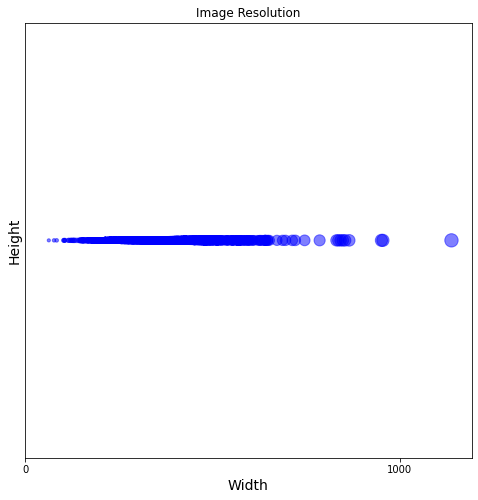

In [2]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*50, picker=True)
plt.title("Image Resolution")
plt.xticks(np.arange(0, max(img_meta_df.Width), 1000))
plt.yticks(np.arange(0, max(img_meta_df.Height), 1000))
plt.xlabel("Width", size=14)
plt.ylabel("Height", size=14)

In [23]:
import cv2

In [25]:
img = cv2.imread('gif_17.jpg')

In [29]:
img = cv2.resize(img, (220,220))

In [30]:
cv2.imwrite('out.jpg',img)

True

In [6]:
import timm

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'crossvit_9_240',
 'crossv

In [ ]:
model = timm.create_model('pnasnet5large', pretrained='imagenet')
count_parameters(model)

In [8]:
model_list_fastai = {"Dense_Net_121":"densenet121",
                     "Dense_Net_169":"densenet169",
                     "Dense_Net_201":"densenet201",
                     "Resnet_18":"resnet18",
                     "Resnet_34":"resnet34",
                     "Resnet_50":"resnet50",
                     "Resnet_101":"resnet101",
                     "Resnet_152":"resnet152",
                     "Inception_v3":"inception_v3",
                     "Inception_Resnet_v2":"inception_resnet_v2",
                     "Xception":"xception",
                     "Vgg_16":"vgg16",
                     "Vgg_19":"vgg19"}

In [9]:
model_list_fastai.keys()

dict_keys(['Resnet_18', 'Resnet_34', 'Resnet_50', 'Resnet_101', 'Resnet_152', 'Dense_Net_121', 'Dense_Net_169', 'Dense_Net_201', 'Inception_v3', 'Inception_Resnet_v2', 'Xception', 'Vgg_16', 'Vgg_19'])